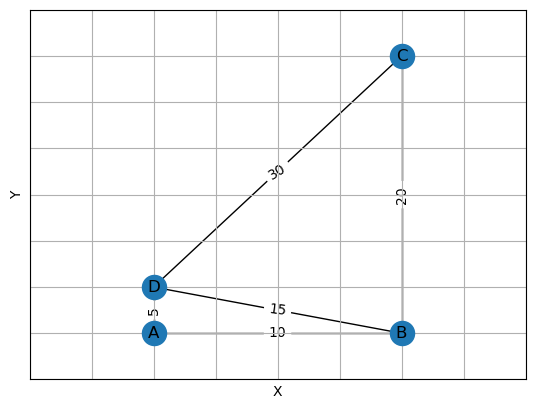

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes with positions
G.add_node('A', pos=(0,0))
G.add_node('B', pos=(10,0))
G.add_node('C', pos=(10,30))
G.add_node('D', pos=(0,5))

# Add edges with weights
G.add_edge('A', 'B', weight=10)
G.add_edge('A', 'D', weight=5)
G.add_edge('D', 'B', weight=15)
G.add_edge('B', 'C', weight=20)
G.add_edge('C', 'D', weight=30)

# Define positions and labels
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_edge_attributes(G, 'weight')

# Create plot
fig, ax = plt.subplots()

# Draw nodes
nx.draw_networkx_nodes(G, pos, ax=ax)

# Draw edges
nx.draw_networkx_edges(G, pos, ax=ax)

# Draw labels
nx.draw_networkx_labels(G, pos, ax=ax)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)

# Set plot limits and labels
ax.set_xlim(-5, 15)
ax.set_ylim(-5, 35)
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Enable grid
ax.grid(True)

# Remove axis from the graph
ax.axis('on')

# Save the figure
plt.savefig("diss3.jpg", dpi=300)

# Show the plot
plt.show()


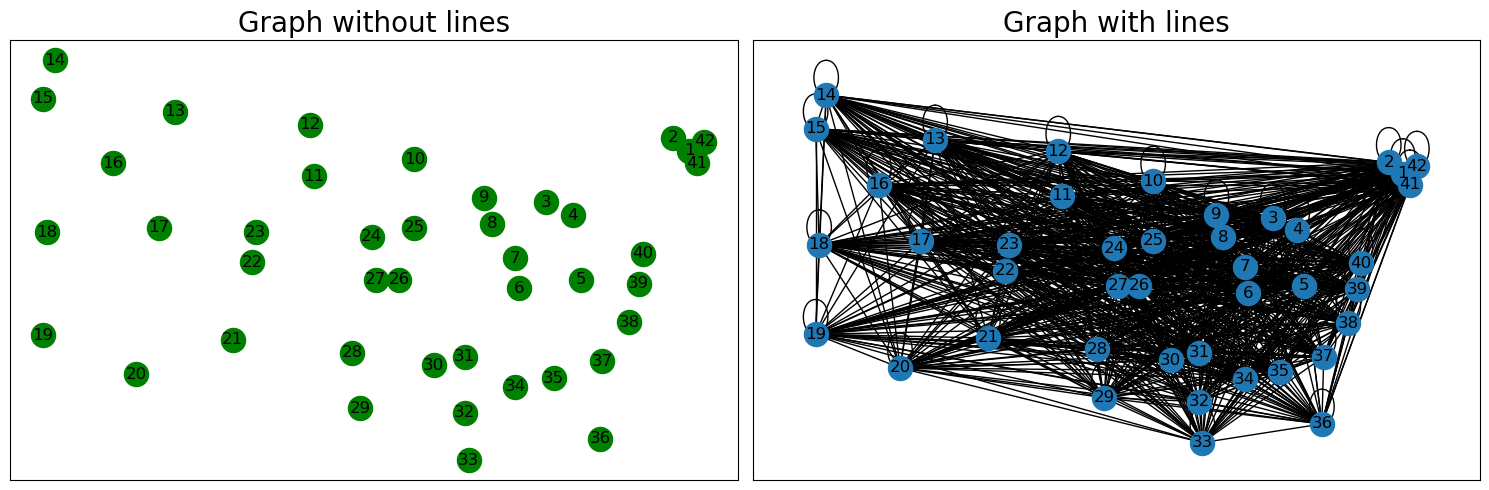

In [16]:
import tsplib95
import networkx as nx
import matplotlib.pyplot as plt

# Load the problem
problem = tsplib95.load('dantzig42.tsp')

# Get the graph
G = problem.get_graph()

# Get node positions
pos = problem.display_data

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Version without lines
nx.draw_networkx_nodes(G, pos, node_color='green', ax=axs[0])
nx.draw_networkx_labels(G, pos, ax=axs[0])
axs[0].set_title("Graph without lines", fontsize=20)

# Version with lines
nx.draw_networkx(G, pos, ax=axs[1])
axs[1].set_title("Graph with lines", fontsize=20)

plt.tight_layout()
plt.savefig('both_graphs.jpg')


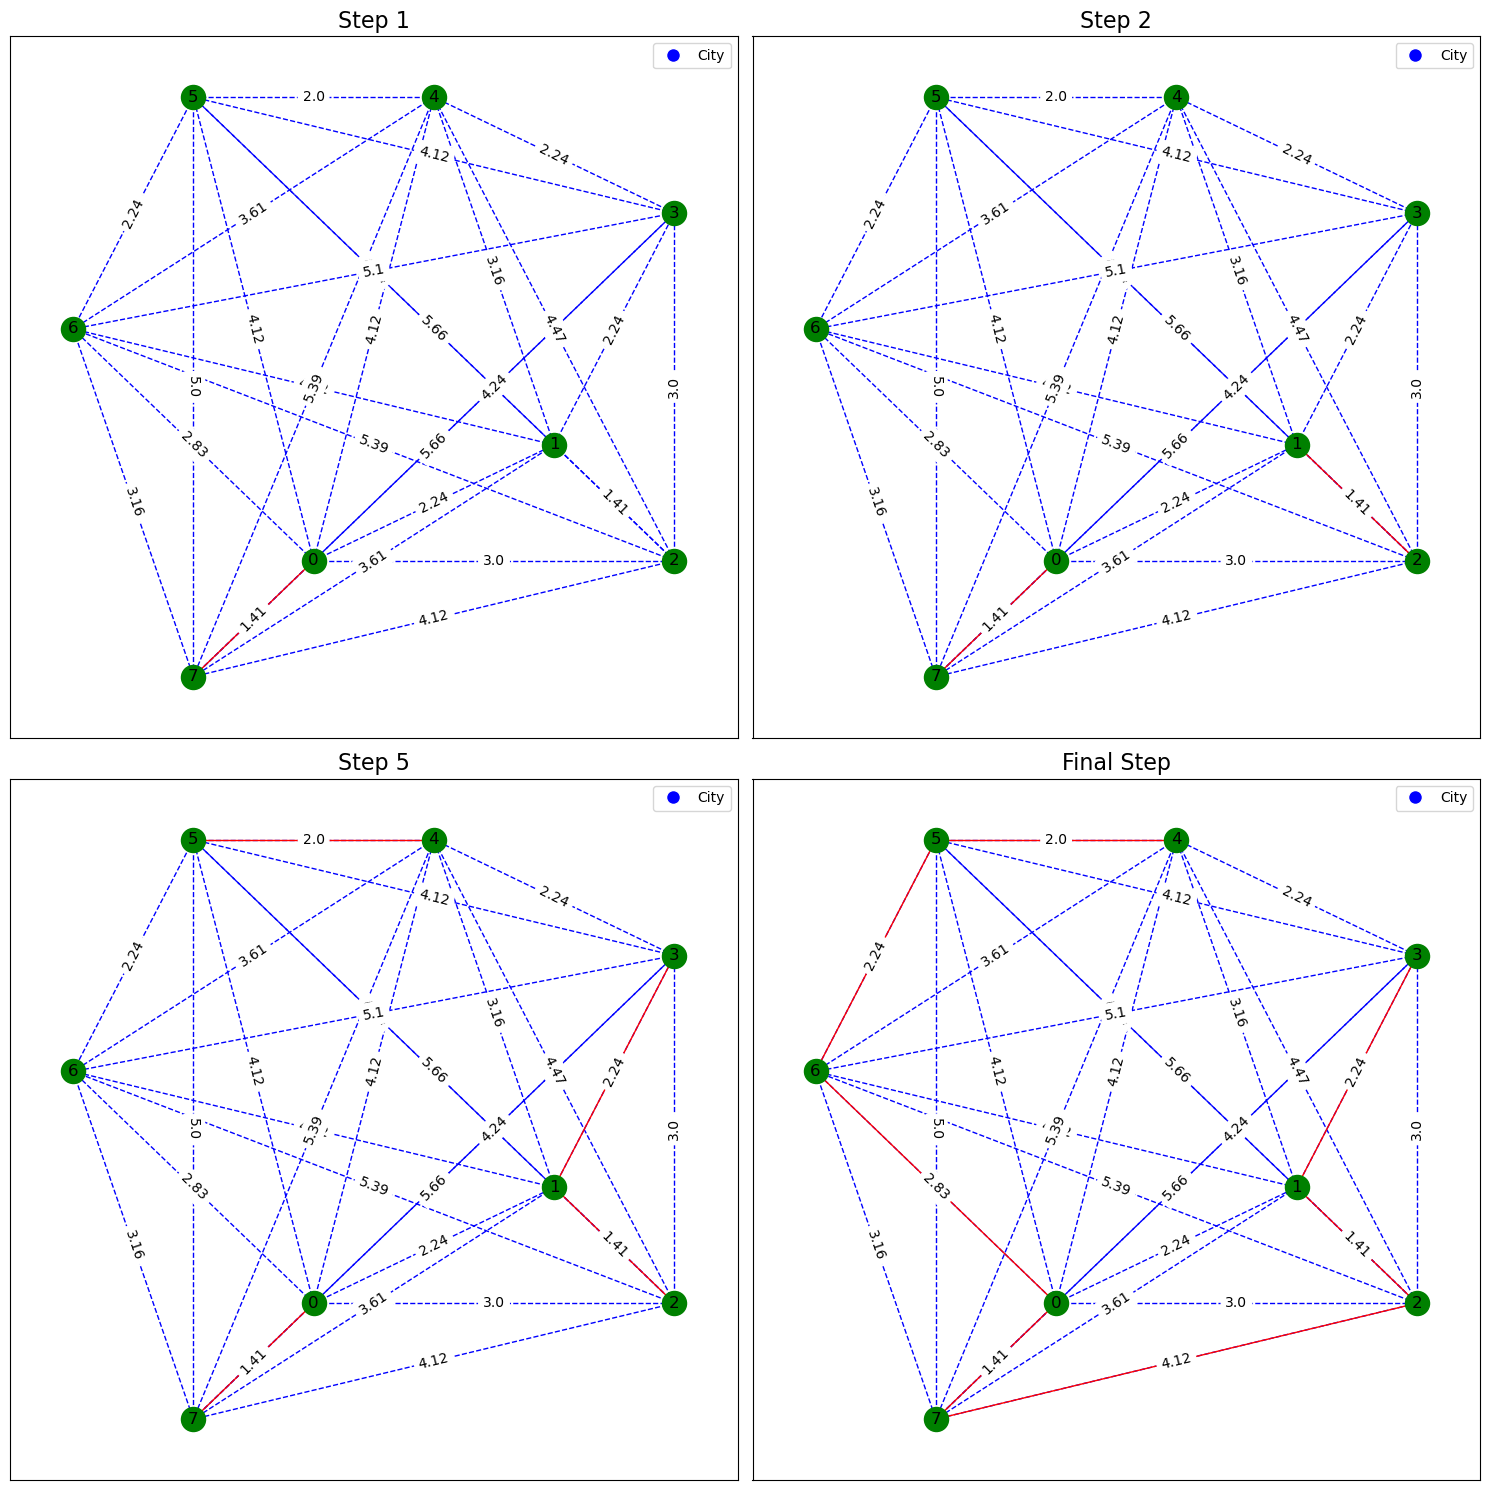

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define 8 points on a 2D plane
pos = {
    0: (0, 0),
    1: (2, 1),
    2: (3, 0),
    3: (3, 3),
    4: (1, 4),
    5: (-1, 4),
    6: (-2, 2),
    7: (-1, -1),
}

# Create the graph and add the edges
G = nx.Graph()
for node1 in pos:
    for node2 in pos:
        if node1 != node2:
            # Add the edge with a weight of the Euclidean distance between nodes
            weight = round(np.sqrt((pos[node1][0] - pos[node2][0])**2 + (pos[node1][1] - pos[node2][1])**2),2)
            G.add_edge(node1, node2, weight=weight)

# Sort the edges by weight
edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Steps at which to save figures
steps = [1, 2, 5] 
step_titles = ["Step 1", "Step 2", "Step 5", "Final Step"]

# Keep track of the tour and the nodes it covers
tour = []
nodes_covered = set()

for step, edge in enumerate(edges, start=1):
    # Avoid creating a cycle until we've covered all nodes
    if edge[0] in nodes_covered and edge[1] in nodes_covered and len(nodes_covered) != len(G.nodes):
        continue

    # Avoid creating a node with degree > 2
    if sum(edge[0] in e or edge[1] in e for e in tour) >= 2:
        continue

    # Add the edge to the tour
    tour.append(edge)
    nodes_covered.update([edge[0], edge[1]])

    # If we've covered all nodes, add an edge from the last node to the first to make a cycle
    if len(nodes_covered) == len(G.nodes):
        # Find the edge connecting the last node added and the first node
        last_edge = next((e for e in edges if (e[0] == edge[1] and e[1] == tour[0][0]) or (e[0] == tour[0][0] and e[1] == edge[1])), None)
        if last_edge is not None:
            tour.append(last_edge)

    if step in steps or len(nodes_covered) == len(G.nodes):
        if step in steps:
            idx = steps.index(step)
        else:
            idx = 3  # For final step
        ax = axs[idx//2, idx%2]
        ax.set_title(step_titles[idx], fontsize=16)

        # Draw nodes
        nx.draw_networkx_nodes(G, pos, node_color='green', ax=ax)

        # Draw edges
        nx.draw_networkx_edges(G, pos, edge_color='blue', style='dashed', ax=ax)

        # Draw edges in the tour as solid lines
        tour_edges = [(e[0], e[1]) for e in tour]
        # If this is the final step, add the edge (2, 7)
        if idx == 3:
            tour_edges.append((2, 7))
        nx.draw_networkx_edges(G, pos, edgelist=tour_edges, edge_color='red', ax=ax)

        # Draw edge labels
        labels = nx.get_edge_attributes(G, "weight")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)

        # Draw node labels
        nx.draw_networkx_labels(G, pos, ax=ax)

        # Draw a legend
        line = plt.Line2D(range(1), range(1), color="white", marker='o', markersize=10, markerfacecolor="blue")
        ax.legend((line,), ("City",), numpoints=1, loc='best')
        

plt.tight_layout()


plt.savefig('greedy_tsp_steps_cycle_grid.jpg')


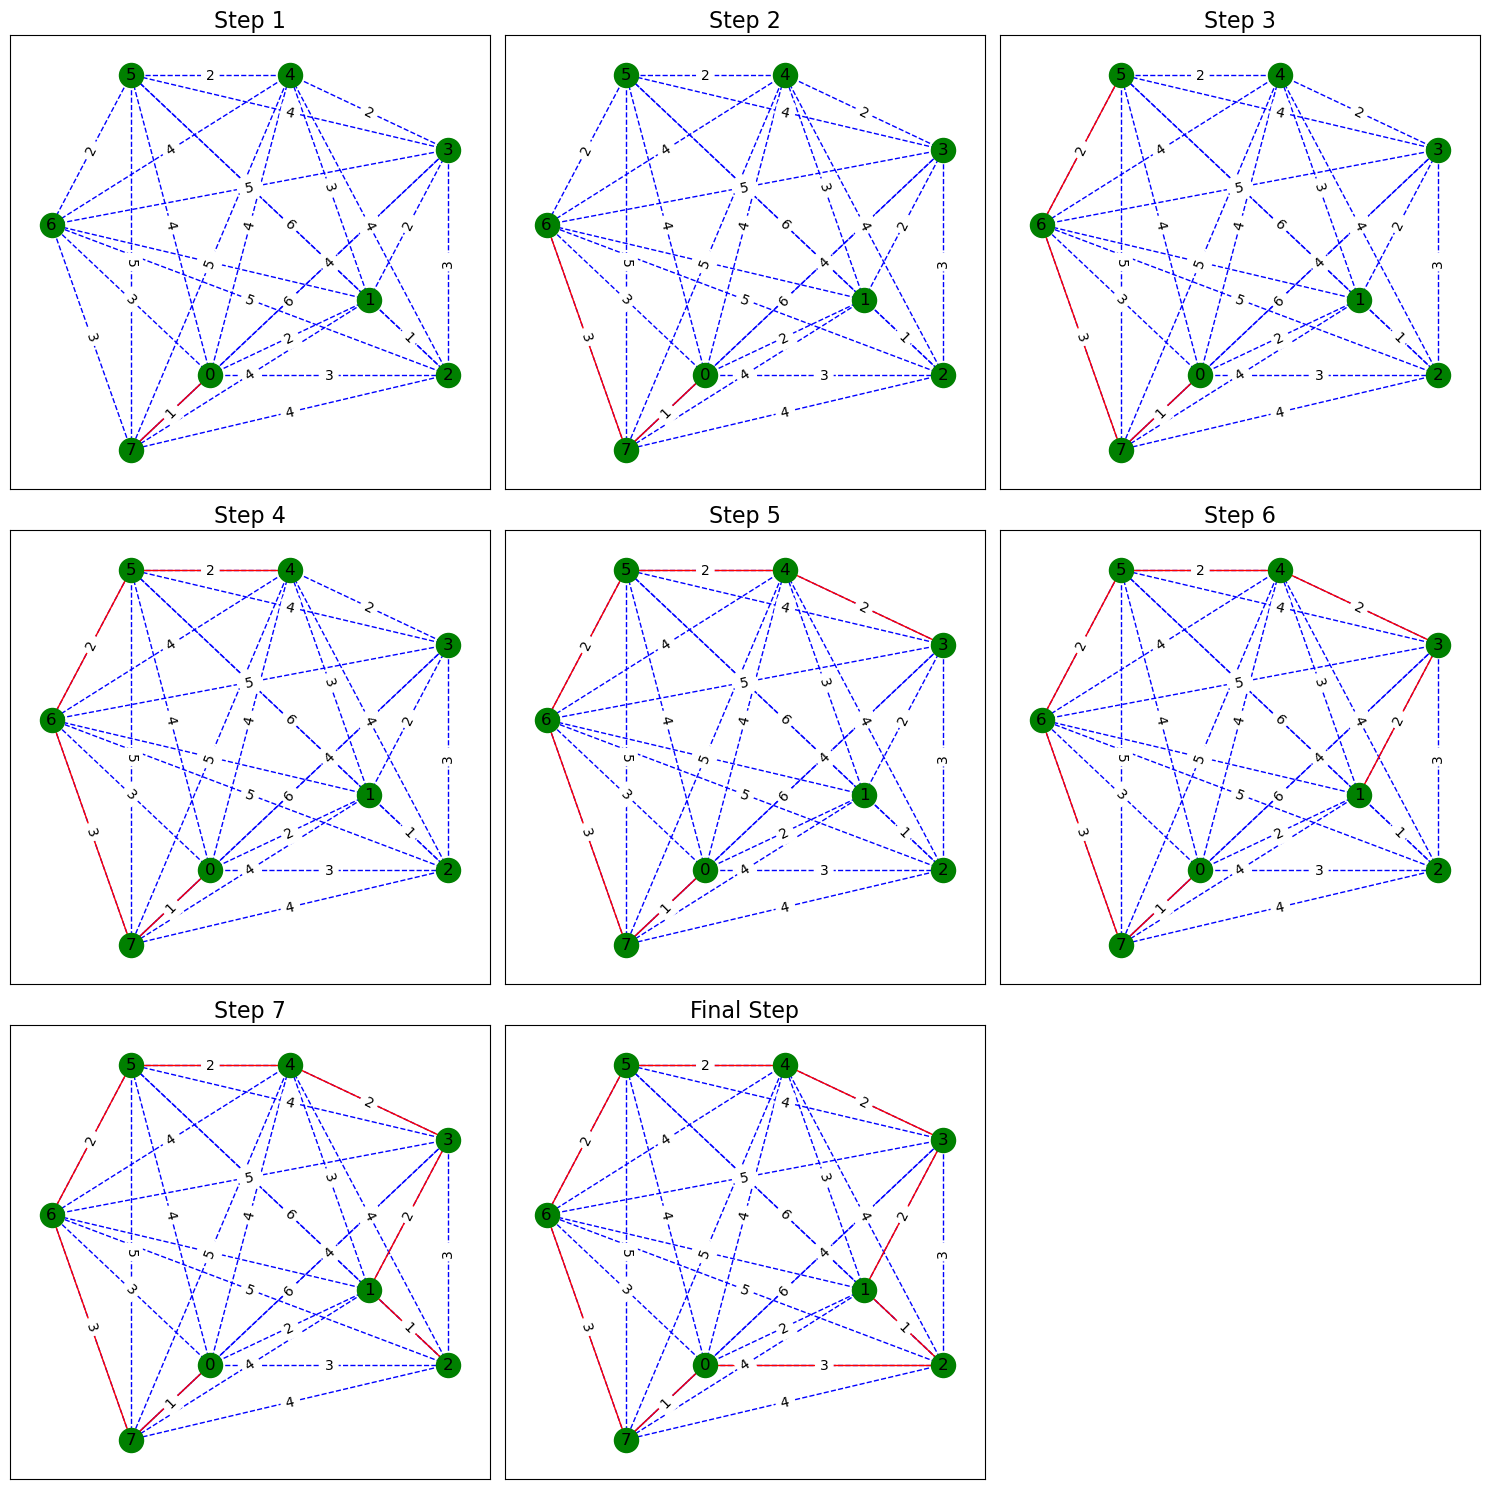

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define 8 points on a 2D plane
pos = {
    0: (0, 0),
    1: (2, 1),
    2: (3, 0),
    3: (3, 3),
    4: (1, 4),
    5: (-1, 4),
    6: (-2, 2),
    7: (-1, -1),
}

# Create the graph and add the edges
G = nx.Graph()
for node1 in pos:
    for node2 in pos:
        if node1 != node2:
            # Add the edge with a weight of the Euclidean distance between nodes
            weight = round(np.sqrt((pos[node1][0] - pos[node2][0])**2 + (pos[node1][1] - pos[node2][1])**2))
            G.add_edge(node1, node2, weight=weight)

# Initialize the tour to start at node 0
tour = [0]

# Initialize the set of visited nodes
visited = set(tour)

# Create a subplot for each step
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

while len(visited) < len(pos):
    current_node = tour[-1]
    next_node = None
    min_weight = float("inf")
    
    # For each neighbor of the current node, find the one with the smallest weight
    for neighbor, data in G[current_node].items():
        if neighbor not in visited and data['weight'] < min_weight:
            min_weight = data['weight']
            next_node = neighbor

    # Add the closest node to the tour and mark it as visited
    tour.append(next_node)
    visited.add(next_node)

    # Plot the current state of the tour
    ax = axs[(len(tour) - 2) // 3, (len(tour) - 2) % 3]
    ax.set_title(f'Step {len(tour) - 1}', fontsize=16)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='green', ax=ax)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='blue', style='dashed', ax=ax)

    # Draw edges in the tour as solid lines
    tour_edges = [(tour[i-1], tour[i]) for i in range(1, len(tour))]
    nx.draw_networkx_edges(G, pos, edgelist=tour_edges, edge_color='red', ax=ax)

    # Draw edge labels
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)

    # Draw node labels
    nx.draw_networkx_labels(G, pos, ax=ax)

# Add the edge from the last node back to the start to complete the cycle
tour.append(tour[0])

# Plot the final state of the tour
ax = axs[(len(tour) - 2) // 3, (len(tour) - 2) % 3]
ax.set_title('Final Step', fontsize=16)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='green', ax=ax)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='blue', style='dashed', ax=ax)

# Draw edges in the tour as solid lines
tour_edges = [(tour[i-1], tour[i]) for i in range(len(tour))]
nx.draw_networkx_edges(G, pos, edgelist=tour_edges, edge_color='red', ax=ax)

# Draw edge labels
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)

# Draw node labels
nx.draw_networkx_labels(G, pos, ax=ax)

# Hide the last subplot if it's empty
if len(pos) < len(axs.flat):
    axs.flat[-1].axis('off')

plt.tight_layout()
plt.savefig('nearest_neighbour_grid.jpg')


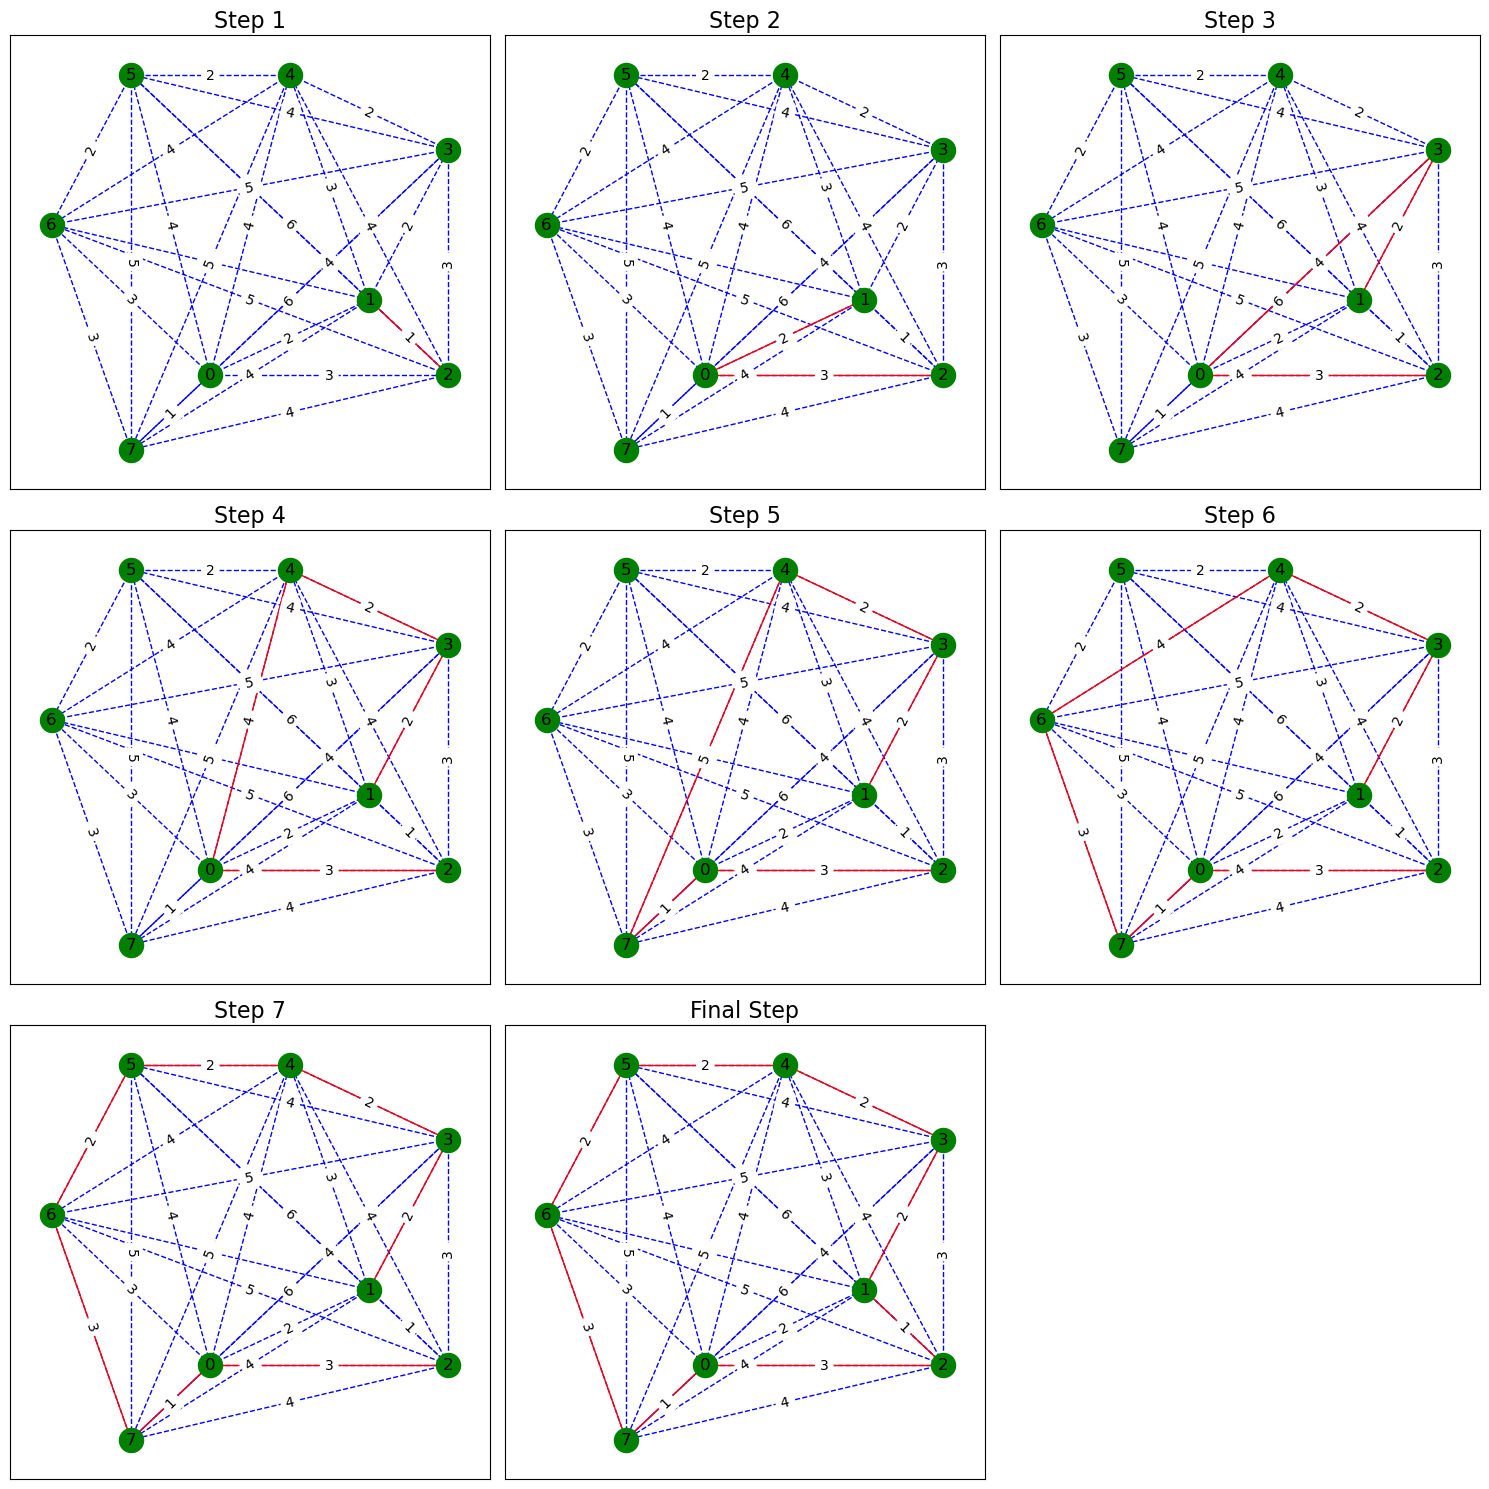

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define 8 points on a 2D plane
pos = {
    0: (0, 0),
    1: (2, 1),
    2: (3, 0),
    3: (3, 3),
    4: (1, 4),
    5: (-1, 4),
    6: (-2, 2),
    7: (-1, -1),
}

# Create the graph and add the edges
G = nx.Graph()
for node1 in pos:
    for node2 in pos:
        if node1 != node2:
            # Add the edge with a weight of the Euclidean distance between nodes
            weight = round(np.sqrt((pos[node1][0] - pos[node2][0])**2 + (pos[node1][1] - pos[node2][1])**2))
            G.add_edge(node1, node2, weight=weight)

# Initialize the tour to start at node 1
tour = [1]

# Initialize the set of visited nodes
visited = set(tour)

# Create a subplot for each step
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

while len(visited) < len(pos):
    current_node = tour[-1]
    next_node = None
    min_weight = float("inf")
    
    # For each unvisited neighbor of the current node, find the one with the smallest weight
    for neighbor, data in G[current_node].items():
        if neighbor not in visited and data['weight'] < min_weight:
            min_weight = data['weight']
            next_node = neighbor

    # If there are at least two nodes in the tour, find the best place to insert the new node
    if len(tour) > 1:
        best_insertion = None
        min_insertion_cost = float("inf")
        for i in range(len(tour)):
            j = (i + 1) % len(tour)
            cost = G.edges[tour[i], next_node]['weight'] + G.edges[next_node, tour[j]]['weight'] - G.edges[tour[i], tour[j]]['weight']
            if cost < min_insertion_cost:
                min_insertion_cost = cost
                best_insertion = i

        # Insert the closest node to the tour at the best place
        tour.insert(best_insertion + 1, next_node)
    else:
        # If there is only one node in the tour, simply append the new node
        tour.append(next_node)

    visited.add(next_node)

    # Plot the current state of the tour
    ax = axs[(len(tour) - 2) // 3, (len(tour) - 2) % 3]
    ax.set_title(f'Step {len(tour) - 1}', fontsize=16)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='green', ax=ax)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='blue', style='dashed', ax=ax)

    # Draw edges in the tour as solid lines
    tour_edges = [(tour[i-1], tour[i]) for i in range(1, len(tour))]
    nx.draw_networkx_edges(G, pos, edgelist=tour_edges, edge_color='red', ax=ax)

    # Draw edge labels
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)

    # Draw node labels
    nx.draw_networkx_labels(G, pos, ax=ax)

# Add the edge from the last node back to the start to complete the cycle
tour.append(tour[0])

# Plot the final state of the tour
ax = axs[(len(tour) - 2) // 3, (len(tour) - 2) % 3]
ax.set_title('Final Step', fontsize=16)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='green', ax=ax)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='blue', style='dashed', ax=ax)

# Draw edges in the tour as solid lines
tour_edges = [(tour[i-1], tour[i]) for i in range(len(tour))]
nx.draw_networkx_edges(G, pos, edgelist=tour_edges, edge_color='red', ax=ax)

# Draw edge labels
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)

# Draw node labels
nx.draw_networkx_labels(G, pos, ax=ax)

# Hide the last subplot if it's empty
if len(pos) < len(axs.flat):
    axs.flat[-1].axis('off')

plt.tight_layout()
plt.savefig('nearest_insertion_tsp_steps_cycle_grid.jpg')

